In [73]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import roc_auc_score, accuracy_score

## 1.

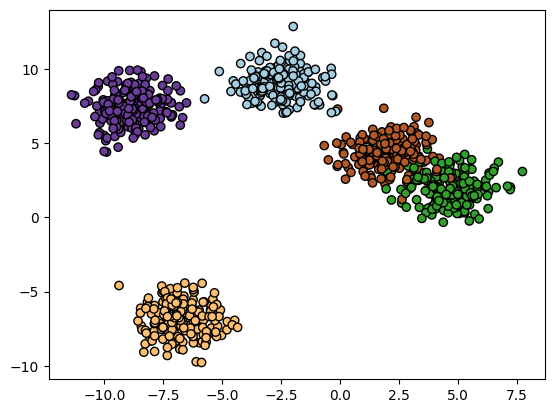

In [74]:
X, y = make_blobs(n_samples=1000, centers=5, n_features=2,random_state=42)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired, edgecolors='k', marker='o')
plt.show()

## 2.

In [75]:
class PerceptronMulticlass:
    def __init__(self,lr, itera, n_cat):
        self.pesos = None
        self.sesgo = None
        self.tasa = lr
        self.n_iter = itera
        self.n_cat = n_cat
        self.fun_act = self.valor_y
        
    def valor_y(self, x):
        return np.where(x >= 0, 1, 0)
    
    def indicadora(self, x):
        return 1 if x == True else 0
    
    def fit(self, X, y):
        n_col = X.shape[1]
        self.pesos = np.zeros((self.n_cat, n_col))
        self.sesgo = np.zeros(self.n_cat)
        self.categ = np.unique(y)
        y_1 = pd.get_dummies(pd.array(y), prefix = "Clase").map(self.indicadora)
        
        for _ in range(self.n_iter):
            for i, x_i in enumerate(X):
                for k in range(self.n_cat):
                    resultado = np.dot(x_i, self.pesos[k]) + self.sesgo[k]
                    y_est = self.fun_act(resultado)
                    
                    update = self.tasa * (y_1.iloc[:,k][i] - y_est)
                    self.pesos[k] += update * x_i
                    self.sesgo[k] += update
    
                
        
    def predict_ind(self,X):
        if X.ndim == 1:
            X = X.reshape(1, -1)
        y_pred = np.zeros(X.shape[0])
        for i, x_i in enumerate(X):
            resultados = np.zeros(self.n_cat)
            for k in range(self.n_cat):
                resultados[k] = np.dot(x_i, self.pesos[k]) + self.sesgo[k]
            y_pred[i] = self.categ[np.argmax(resultados)]
        return y_pred
        
    def plot_decision_boundary(self, X, y):
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k', marker='o')
        x_min, x_max = np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1
        y_min, y_max = np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
        Z = np.array([perceptron.predict_ind(np.array([xi, yi])) for xi, yi in zip(xx.ravel(), yy.ravel())])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.3)
        plt.show()

In [77]:
%%time
perceptron = PerceptronMulticlass(lr = 0.01, itera = 100, n_cat = 5)
perceptron.fit(X,y)

CPU times: total: 29.9 s
Wall time: 37.6 s


In [78]:
print(f"Los pesos son: {perceptron.pesos}")
print(f"El valor de los sesgos es: {perceptron.sesgo}")

Los pesos son: [[ 0.16877165  0.58950871]
 [ 0.20759088 -0.08269489]
 [-0.00320097 -0.09945892]
 [-0.13099601  0.04772395]
 [ 0.00692054 -0.05228478]]
El valor de los sesgos es: [-3.9  -0.3  -0.03 -1.18 -0.3 ]


In [79]:
ypred = perceptron.predict_ind(X)
ypred[0:11]

array([1., 1., 2., 1., 1., 2., 3., 1., 1., 1., 1.])

In [80]:
ypred = ypred.astype(int)

In [81]:
print(f"El accuracy es de: {accuracy_score(y, ypred)}")

El accuracy es de: 0.795


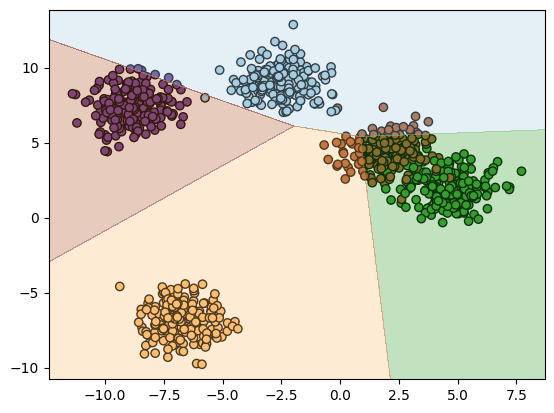

CPU times: total: 58.2 s
Wall time: 1min 12s


In [82]:
%%time
perceptron.plot_decision_boundary(X,y)